In [1]:
%load_ext autoreload
%autoreload 2

import sys
from lifting_rl.linkage_env import LinkageEnv
from livelossplot import PlotLosses
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifting_rl.ddpg.model import Critic, Actor
from lifting_rl.ddpg.utils import OUNoise, NormalizedEnv, Memory
from lifting_rl.ddpg.agent import DDPGagent

In [5]:
params = {
    "N_LINKS": 5,
    "GOAL_POS":  np.array([np.pi / 4, np.pi/4, np.pi/4, -np.pi/2, np.pi/2, 0, 0, 0, 0, 0], dtype=np.float32),
    "INIT_STATE": np.array([np.pi / 2, np.pi/2, np.pi/2, -np.pi/4, np.pi/4, 0, 0, 0, 0, 0], dtype=np.float32),
    "PARAM_VALS": np.array([9.81, 0.4, 1, 0.4, 1, 0.6, 1, 0.4, 1, 0.4, 1]),
    "OBS_LOW": np.array([0, np.pi/4, -np.pi/2, -np.pi, -np.pi, -8, -8, -8, -8, -8], dtype=np.float32),
    "OBS_HIGH": np.array(
        [3*np.pi/4, 3*np.pi/2, 3*np.pi/4, np.pi/2, np.pi, 8, 8, 8, 8, 8], dtype=np.float32
    ),
    "ACT_LOW": -100,
    "ACT_HIGH": 100,
    "TIME_STEP": 0.01,
    "VIDEO_FPS": 30,
}

In [6]:
angles_file = "../data/skeleton_angles.csv"

In [7]:
env = NormalizedEnv(LinkageEnv(angles_file, params, verbose=0))

observation_space:  Box(-8.0, 8.0, (10,), float32)
action_space:  Box(-100.0, 100.0, (5,), float32)


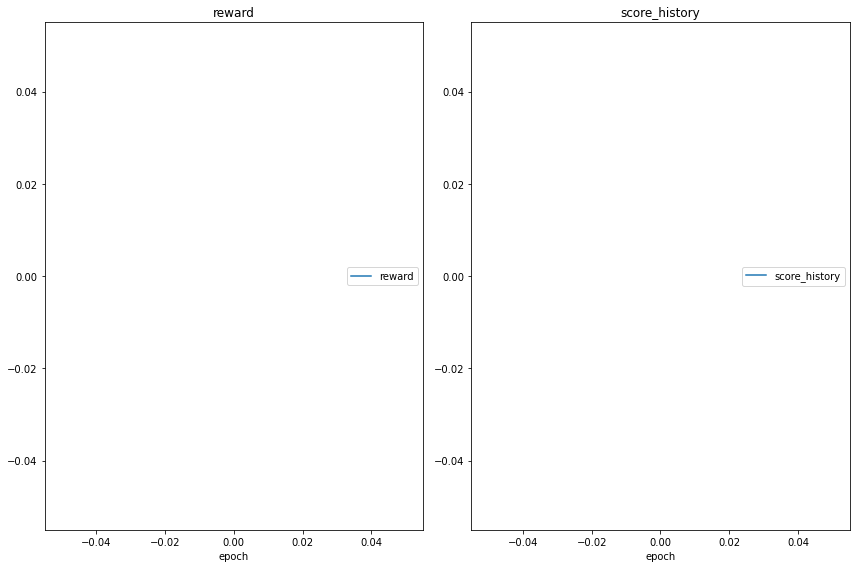

reward
	reward           	 (min:      nan, max:      nan, cur:      nan)
score_history
	score_history    	 (min:      nan, max:      nan, cur:      nan)


KeyboardInterrupt: 

In [9]:
from tqdm.auto import tqdm


agent = DDPGagent(env, device = 'cuda:0')
noise = OUNoise(env.action_space)
batch_size = 256
rewards = []
avg_rewards = []

liveloss = PlotLosses()

for episode in tqdm(list(range(10000))):
    state = env.reset()
    noise.reset()
    episode_reward = 0
    
    for step in range(500):
        action = agent.get_action(state)
        action = noise.get_action(action, step)
        new_state, reward, done, _ = env.step(action) 
        agent.memory.push(state, action, reward, new_state, done)
        
        if len(agent.memory) > batch_size:
            agent.update(batch_size)        
        
        state = new_state
        episode_reward += reward

        if done:
            sys.stdout.write("episode: {}, reward: {}, average _reward: {} \n".format(
                episode, np.round(episode_reward, decimals=2), np.mean(rewards[-10:]))
            )
            break
    metrics = {
        "score_history": np.mean(rewards[-10:]),
        "reward": episode_reward
    }
    liveloss.update(metrics)
    liveloss.send()
    
    rewards.append(episode_reward)
    avg_rewards.append(np.mean(rewards[-10:]))

plt.plot(rewards)
plt.plot(avg_rewards)
plt.plot()
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

In [10]:
episode

5573

In [11]:
rewards

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan